### Project: Time Series Model
#### Problem statement
##### Hint:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from pandas.tools.plotting import autocorrelation_plot 

from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARIMA, ARMAResults

import datetime

import sys

import seaborn as sns

import statsmodels

import statsmodels.stats.diagnostic as diag

from statsmodels.tsa.stattools import adfuller

from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr

plt.style.use('fivethirtyeight')

%matplotlib inline

df = pd.read_csv('C:/Users/Downloads/sp500/data_stocks.csv')

df.head()

In [1]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

import datetime
import time
import sys
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag

from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')

%matplotlib inline

In [6]:
df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,164.630,888.5500,49.850,219.11,39.43,274.080,31.780,81.03,124.89,58.820,77.725,330.73,72.430,37.470,119.385,167.740,33.7400,46.6450,126.8600,59.720,83.5400,29.020,28.370,63.4900,78.4600,89.90,33.3975,400.9400,...,18.6100,19.8901,70.69,36.26,124.66,164.62,47.0400,106.27,107.65,124.5901,51.6200,112.36,89.35,91.130,55.21,66.5900,120.1300,100.35,65.07,48.730,156.390,60.46,55.70,171.83,73.08,29.62,72.1000,52.160,20.34,34.00,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,164.680,887.1173,49.940,219.98,39.68,273.990,31.780,81.21,124.99,58.495,77.940,330.73,72.040,37.540,118.810,167.776,33.8800,46.6100,126.8600,59.830,83.9400,29.140,28.400,63.4600,78.6200,89.73,33.3950,400.4000,...,18.5100,19.8901,70.77,36.26,124.82,164.39,47.0400,106.27,107.65,124.5901,51.5800,112.36,89.35,91.210,55.12,66.3550,120.1300,100.03,65.04,48.752,157.190,59.93,55.81,171.54,72.95,29.64,72.1800,52.245,20.32,34.07,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,164.905,887.5110,49.860,219.39,39.60,274.275,31.765,81.21,125.00,58.470,77.815,330.73,72.055,37.610,118.830,168.000,33.9000,46.8850,126.9576,59.905,83.9400,29.150,28.375,63.5250,78.6311,89.24,33.4100,401.9850,...,18.4397,19.7900,70.62,36.19,124.82,165.30,46.9800,106.38,107.31,124.7100,51.4600,112.13,89.16,91.080,55.09,66.2417,120.3368,100.39,65.08,48.720,157.070,60.08,55.64,171.55,72.98,29.67,72.3192,52.200,20.26,34.11,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,164.760,886.2700,49.915,219.30,39.57,273.590,31.830,81.13,124.73,58.420,77.950,330.73,72.140,37.620,118.680,168.200,33.8499,46.7000,126.7000,59.700,83.7064,29.125,28.350,63.5300,78.7060,89.17,33.3350,401.5000,...,18.3700,19.7875,70.62,36.00,124.82,165.16,46.8097,106.33,107.49,124.4889,51.3800,112.01,89.06,91.015,55.21,66.1700,120.3100,100.39,64.95,48.695,156.945,60.39,55.64,171.26,73.09,29.79,72.4300,52.140,20.20,33.97,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,164.850,886.5800,49.915,219.18,39.55,273.540,31.830,81.12,124.83,58.600,78.050,330.73,72.215,37.625,118.935,168.040,33.8400,46.8562,126.8900,59.500,84.0000,29.140,28.410,63.6344,78.5850,88.95,33.4000,399.7704,...,18.3850,19.7324,70.78,36.01,124.82,165.24,47.0200,106.56,107.48,125.2449,51.4347,112.23,89.10,91.000,55.32,66.1800,120.3600,100.11,64.84,48.630,157.160,60.18,55.68,171.18,72.99,29.71,72.4800,52.140,20.22,34.00,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [0]:
df.rename(columns={'NASDAQ.AAPL': 'AAPL', 'NASDAQ.ADP': 'ADP', 'NASDAQ.CBOE': 'CBOE', 
                   'NASDAQ.CSCO': 'CSCO', 'NASDAQ.EBAY': 'EBAY'
                  }, inplace=True)

df_AAPL = df[["AAPL"]]
df_ADP = df[["ADP"]]
df_CBOE = df[["CBOE"]]
df_CSCO = df[["CSCO"]]
df_EBAY = df[["EBAY"]]

### (1) Time series forecasting for AAPL

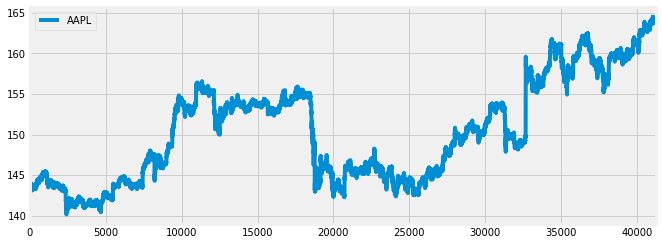

In [8]:
df_AAPL.plot(figsize=(10,4))

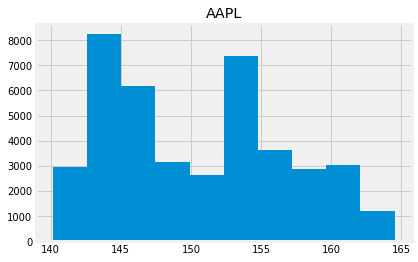

In [9]:
from pandas import Series
from matplotlib import pyplot
series = df_AAPL
series.hist()
pyplot.show()

The histogram shows that the stock prices were not normally distributed

In [10]:
from pandas import Series
series = df_AAPL
X = series.values
L = len(X)
split = int(L / 3)
last = L-split
X1, X2, X3 = X[0:split], X[split+1: last], X[last+1:]
mean1, mean2, mean3 = X1.mean(), X2.mean(), X3.mean()
var1, var2, var3 = X1.var(), X2.var(), X3.var()
print('mean1=         %f, mean2=        %f, mean3=        %f' % (mean1, mean2, mean3))
print('variance1=     %f, variance2=    %f, variance2=    %f' % (var1, var2, var3))

mean1=         146.987785, mean2=        148.207600, mean3=        156.165654
variance1=     24.315737, variance2=    19.309152, variance2=    23.387876


In [11]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

#H0: Series is not Stationary
#H1: Series is stationary

series = df['AAPL'].dropna()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.912853
p-value: 0.783710
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


p-value > 0.05, Null Hypothesis is true. So the series is NOT Stationary.

**Log Transformation**

mean1=         4.989793, mean2=        4.998178, mean3=        5.050435
variance1=     0.001107, variance2=    0.000867, variance2=    0.000968


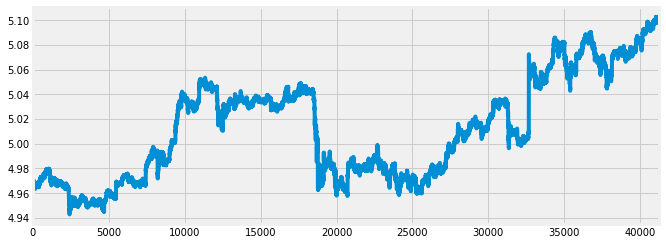

In [12]:
from pandas import Series
from numpy import log

series = df_AAPL
X = series.values
X = log(X)
L = len(X)
split = int(L / 3)
last = L-split
X1, X2, X3 = X[0:split], X[split+1: last], X[last+1:]
mean1, mean2, mean3 = X1.mean(), X2.mean(), X3.mean()
var1, var2, var3 = X1.var(), X2.var(), X3.var()
print('mean1=         %f, mean2=        %f, mean3=        %f' % (mean1, mean2, mean3))
print('variance1=     %f, variance2=    %f, variance2=    %f' % (var1, var2, var3))

# Checking the plots to see if log transformation has made it stationary or not

df['logAAPL']= np.log(df['AAPL'])
df['logAAPL'].plot(figsize=(10,4))

From the above chart, we can understand that the log series is NOT stationary.

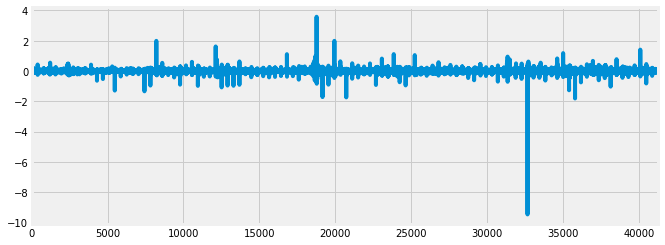

In [13]:
df['dif_AAPL'] = df['AAPL'] - df['AAPL'].shift(periods=-1)
df['dif_AAPL'].plot(figsize=(10,4))

In [14]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

series = df['dif_AAPL'].dropna()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -35.737741
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


 p-value < 0.05; reject the NULL Hypothesis; So the series with first differencing is stationary.

ADF Statistic: -35.706087
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


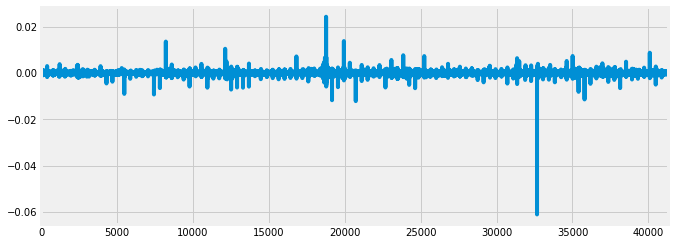

In [15]:
df['diflogAAPL'] = df['logAAPL'] - df['logAAPL'].shift(periods=-1)
df['diflogAAPL'].plot(figsize=(10,4))

from pandas import Series
from statsmodels.tsa.stattools import adfuller

series = df['diflogAAPL'].dropna()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

From the above we can understand that log-first-difference series is stationary.

#### Autocorrelations

In [16]:
sm.stats.durbin_watson(df['diflogAAPL'].dropna()) 

2.0184420398643126

The value of Durbin-Watson statistic is close to 2 if the errors are uncorrelated. 

In this case, it is 2. 

That means that there is a strong evidence that there is zero autocorrelation.<br>

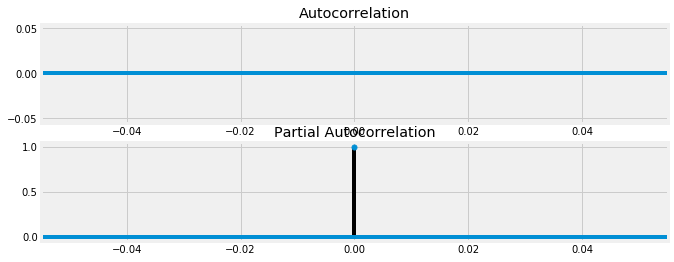

In [17]:
# Lets plot ACF and PACF plots

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['diflogAAPL'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['diflogAAPL'], lags=40, ax=ax2)

ACF graph shows that there is zero autocorrelation. So, p = 0

PACF graph shows spike only at zero. So q = 0

In [0]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

df['logAAPL']= np.log(df['AAPL'])
df['diflogAAPL'] = df['logAAPL'] - df['logAAPL'].shift(periods=-1) # first difference as earlier identified

df = df.dropna()

# Splitting the data into 2 - for model fit and for test

data = df[['DATE','DATE_F','AAPL','logAAPL','diflogAAPL']][:-100]
test = df[['DATE','DATE_F','AAPL','logAAPL','diflogAAPL']][-100:]


**p, d, q parameters for ARIMA**

In [19]:
ararray = (data.logAAPL.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(0, 1, 0) -491424.29994187655
(0, 1, 1) -491425.9256926867
(0, 1, 2) -491436.9839898711
(1, 1, 0) -491425.8022177791


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 1, 1) -491426.28808854416
(1, 1, 2) -491437.6769410524
(2, 1, 0) -491436.7200997984
(2, 1, 1) -491437.1244590186
Best Model is : (1, 1, 2)


#### Building the model

In [20]:
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
ARIMIAmod.predict(typ = 'levels')

array([4.9675918 , 4.96772973, 4.96766032, ..., 5.09913551, 5.09931256,
       5.09913796])

In [21]:
data.loc[1:, 'predict'] = ARIMIAmod.predict(typ='levels')
data.head()

,DATE,DATE_F,AAPL,logAAPL,diflogAAPL,predict
0,1491226200,2017-04-03 13:30:00,143.6800,4.967589,-0.000139,NaN
1,1491226260,2017-04-03 13:31:00,143.7000,4.967728,0.000069,4.967592
2,1491226320,2017-04-03 13:32:00,143.6901,4.967659,0.000349,4.967730
3,1491226380,2017-04-03 13:33:00,143.6400,4.967310,-0.000139,4.967660
4,1491226440,2017-04-03 13:34:00,143.6600,4.967449,-0.000835,4.967319


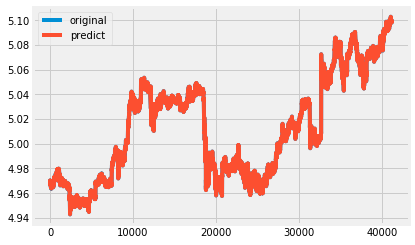

In [22]:
plt.plot(data['logAAPL'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [23]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[5.0978687 , 5.10029291],
       [5.09737787, 5.10079031],
       [5.09701322, 5.10116129],
       [5.09670147, 5.10147944],
       [5.09642749, 5.10175979],
       [5.0961795 , 5.10201417],
       [5.09595155, 5.1022485 ],
       [5.09573943, 5.102467  ],
       [5.09554029, 5.10267253],
       [5.09535203, 5.10286717]])

In [24]:
data['error'] = (data['logAAPL'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])
data.head()

,DATE,DATE_F,AAPL,logAAPL,diflogAAPL,predict,error,sqrError,absError
0,1491226200,2017-04-03 13:30:00,143.6800,4.967589,-0.000139,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 13:31:00,143.7000,4.967728,0.000069,4.967592,0.000136,1.849506e-08,0.000136
2,1491226320,2017-04-03 13:32:00,143.6901,4.967659,0.000349,4.967730,-0.000071,5.017208e-09,0.000071
3,1491226380,2017-04-03 13:33:00,143.6400,4.967310,-0.000139,4.967660,-0.000350,1.226073e-07,0.000350
4,1491226440,2017-04-03 13:34:00,143.6600,4.967449,-0.000835,4.967319,0.000131,1.710611e-08,0.000131


Text(0.5, 0, 'Month')

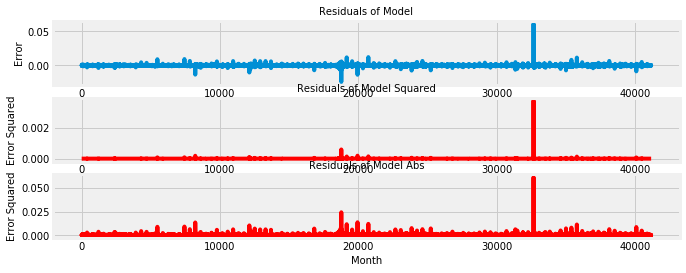

In [25]:
fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

Text(0, 0.5, 'ACF')

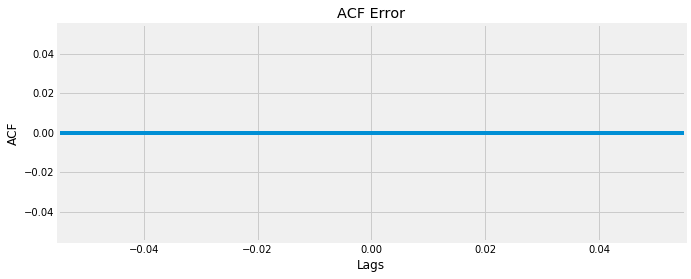

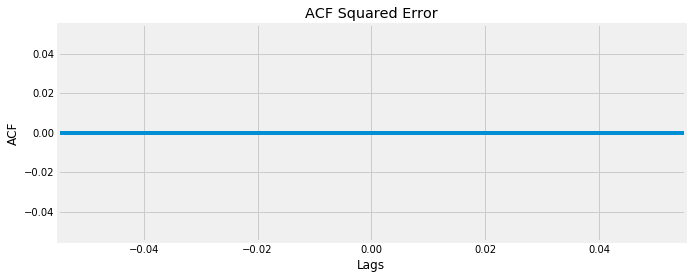

In [26]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.error, lags = 25, ax = ax)
ax.set_title('ACF Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.sqrError, lags = 25, ax = ax)
ax.set_title('ACF Squared Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

Text(0, 0.5, 'PACF')

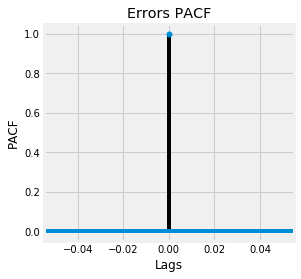

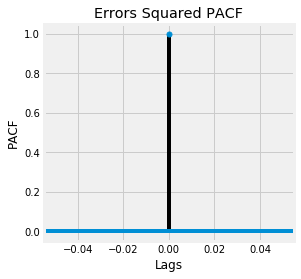

In [27]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

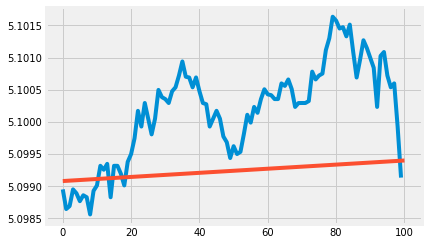

In [28]:
plt.plot(test.reset_index().logAAPL)
plt.plot(ARIMIAmod.predict(start=data.shape[0], end=data.shape[0]+100, typ='levels'))

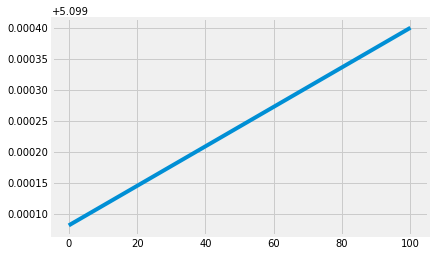

In [29]:
plt.plot(ARIMIAmod.predict(start=data.shape[0], end=data.shape[0]+100, typ='levels'))

#### Forecasting

In [30]:
test = test.reset_index()

test_logAAPL = list(test.logAAPL.values)

ararray = list(data.logAAPL.values)
test_predict = []
for i in range(99):
    print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logAAPL[i])

0
1
2
3
4
5


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6
7
8
9
10
11


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


12
13
14
15
16
17
18
19


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


20
21
22
23
24


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


25
26


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


27


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


28


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


29
30
31
32
33
34
35
36
37


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


38
39
40
41
42
43
44
45
46
47
48


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


49
50


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


51
52


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


53


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


54
55
56


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


57
58


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


59
60
61
62


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


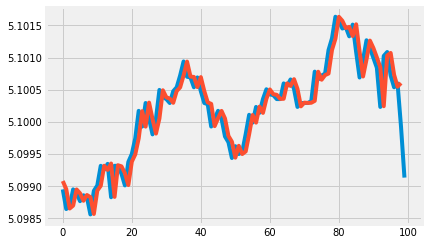

In [31]:
plt.plot(test_logAAPL)
plt.plot(np.array(test_predict).ravel())

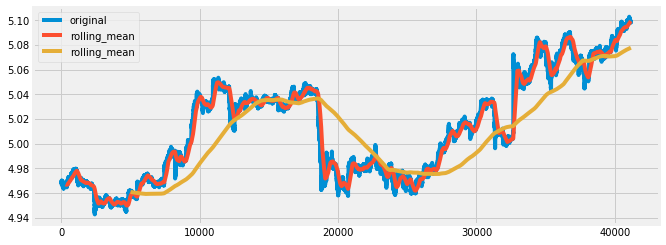

In [32]:
plt.figure(figsize=(10,4))
plt.plot(data.logAAPL, label='original')
plt.plot(data.logAAPL.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logAAPL.rolling(5000).mean(), label='rolling_mean')
plt.legend()

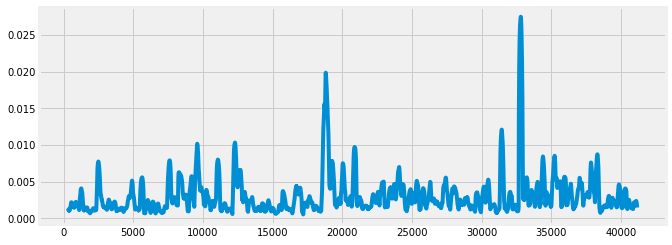

In [33]:
plt.figure(figsize=(10,4))
plt.plot(data.logAAPL.rolling(300).std())

In [34]:
data.head()

,DATE,DATE_F,AAPL,logAAPL,diflogAAPL,predict,error,sqrError,absError
0,1491226200,2017-04-03 13:30:00,143.6800,4.967589,-0.000139,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 13:31:00,143.7000,4.967728,0.000069,4.967592,0.000136,1.849506e-08,0.000136
2,1491226320,2017-04-03 13:32:00,143.6901,4.967659,0.000349,4.967730,-0.000071,5.017208e-09,0.000071
3,1491226380,2017-04-03 13:33:00,143.6400,4.967310,-0.000139,4.967660,-0.000350,1.226073e-07,0.000350
4,1491226440,2017-04-03 13:34:00,143.6600,4.967449,-0.000835,4.967319,0.000131,1.710611e-08,0.000131


In [35]:
import numpy as np

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

print("MFE = ", mean_forecast_err(data.AAPL, np.exp(data.predict)))
print("MAE = ", mean_absolute_err(data.AAPL, np.exp(data.predict)))

MFE =  1.1268309741153275e-05
MAE =  7.503848520024311e-08


Mean Forecast error is zero, which shows that ARIMA is a great fit

#### 2. ADP

In [0]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
df['logADP']= np.log(df['ADP'])
df['diflogADP'] = df['logADP'] - df['logADP'].shift(periods=-1)
df = df.dropna()

In [0]:
# Splitting the data into 2 - for model fit and for test
data = df[['DATE','DATE_F','ADP','logADP','diflogADP']][:-100]
test = df[['DATE','DATE_F','ADP','logADP','diflogADP']][-100:]

In [38]:
print("Size of data ", data.shape)
print("Size of test ", test.shape)

Size of data  (41164, 5)
Size of test  (100, 5)


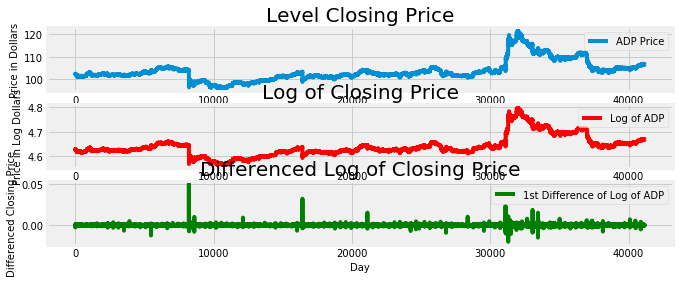

In [39]:
# Plotting the series and its transformation to check for stationarity

fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.ADP, label = "ADP Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data.logADP, label = 'Log of ADP', color = 'r')
plt.title("Log of Closing Price", size = 20,)
plt.ylabel("Price in Log Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot( data.diflogADP, label = '1st Difference of Log of ADP', color = 'g')
plt.title("Differenced Log of Closing Price", size = 20,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)
plt.legend()

In [40]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data.diflogADP, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -30.711101
p-value                            0.000000
# Lags Used                       39.000000
Number of Observations Used    41124.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


Since p-value = 0, this log-first-difference series is Stationary.

#### Autocorrelation

In [41]:
sm.stats.durbin_watson(df['diflogADP'].dropna())

1.8804134653934774

Since DW statistic is close to 2, we can say that there is minimum auto-correlation

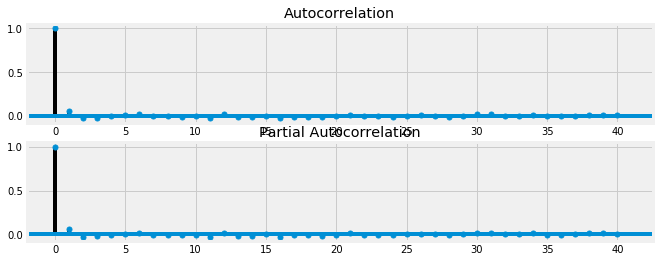

In [42]:
# Lets plot ACF and PACF plots

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['diflogADP'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['diflogADP'], lags=40, ax=ax2)

In [43]:
# To systematically find the ARIMA model parameters

ararray = (data.logADP.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(0, 1, 0) -481263.54058516544
(0, 1, 1) -481415.45165568014


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 1, 2) -481429.2585908664
(1, 1, 0) -481408.57611376053
(1, 1, 1) -481423.9069492964
(1, 1, 2) -481437.47947746894
(2, 1, 0) -481435.20261440246
(2, 1, 1) -481440.03041549824
(2, 1, 2) -481449.8577416236


#### Building Model

In [44]:
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

data.loc[1:, 'predict'] = ARIMIAmod.predict(typ='levels')
data.head()

,DATE,DATE_F,ADP,logADP,diflogADP,predict
0,1491226200,2017-04-03 13:30:00,102.2300,4.627225,0.000881,NaN
1,1491226260,2017-04-03 13:31:00,102.1400,4.626344,-0.000710,4.627226
2,1491226320,2017-04-03 13:32:00,102.2125,4.627054,0.000710,4.626294
3,1491226380,2017-04-03 13:33:00,102.1400,4.626344,0.000784,4.627120
4,1491226440,2017-04-03 13:34:00,102.0600,4.625561,0.000196,4.626308


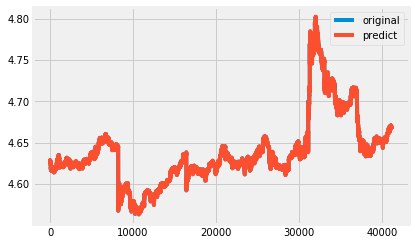

In [45]:
plt.plot(data['logADP'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [46]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[4.66752888, 4.67026531],
       [4.66690226, 4.6708889 ],
       [4.66644671, 4.67134438],
       [4.66608318, 4.67171075],
       [4.66576429, 4.67203263],
       [4.66547088, 4.67232817],
       [4.66519858, 4.67260221],
       [4.66494552, 4.67285714],
       [4.66470862, 4.67309609],
       [4.66448468, 4.6733221 ]])

In [47]:
data['error'] = (data['logADP'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])
data.head()

,DATE,DATE_F,ADP,logADP,diflogADP,predict,error,sqrError,absError
0,1491226200,2017-04-03 13:30:00,102.2300,4.627225,0.000881,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 13:31:00,102.1400,4.626344,-0.000710,4.627226,-0.000882,7.775043e-07,0.000882
2,1491226320,2017-04-03 13:32:00,102.2125,4.627054,0.000710,4.626294,0.000760,5.780108e-07,0.000760
3,1491226380,2017-04-03 13:33:00,102.1400,4.626344,0.000784,4.627120,-0.000775,6.008874e-07,0.000775
4,1491226440,2017-04-03 13:34:00,102.0600,4.625561,0.000196,4.626308,-0.000747,5.583438e-07,0.000747


Text(0.5, 0, 'Month')

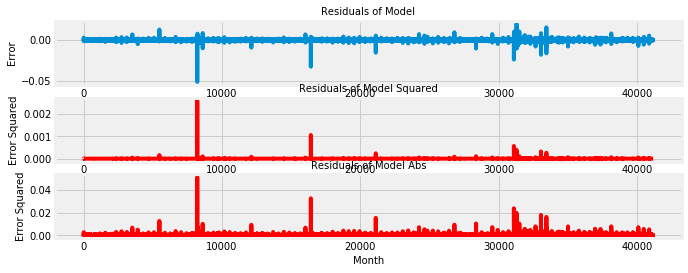

In [48]:
fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)


Text(0, 0.5, 'ACF')

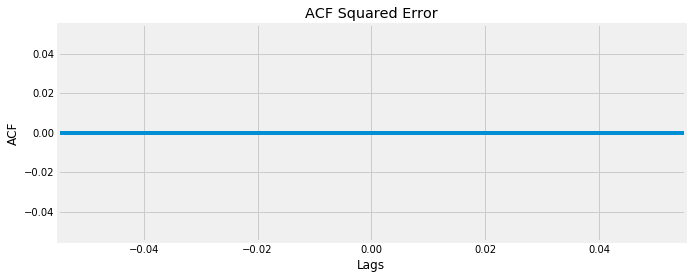

In [49]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.error, lags = 25, ax = ax)
ax.set_title('ACF Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

plot_acf(data.sqrError, lags = 25, ax = ax)
ax.set_title('ACF Squared Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')


Text(0, 0.5, 'PACF')

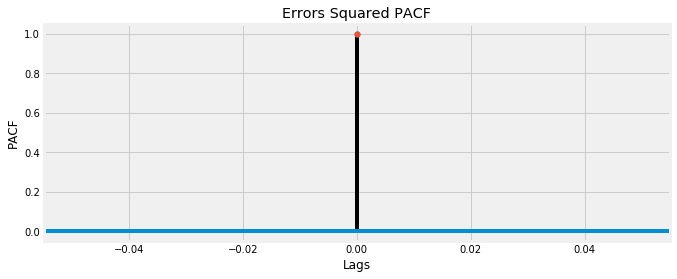

In [50]:
fig, ax = plt.subplots(figsize=(10,4))

plot_pacf(data.error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

plot_pacf(data.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

#### Forecasting

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


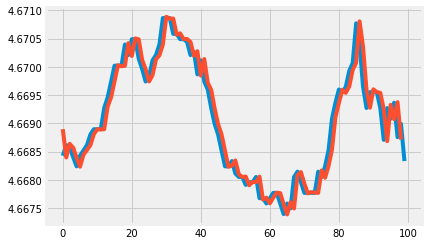

In [52]:
test = test.reset_index()
test_logADP = list(test.logADP.values)

ararray = list(data.logADP.values)
test_predict = []
for i in range(99):
    #print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logADP[i])
    
plt.plot(test_logADP)
plt.plot(np.array(test_predict).ravel())

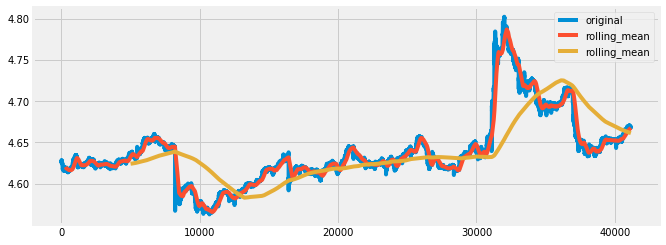

In [53]:
plt.figure(figsize=(10,4))
plt.plot(data.logADP, label='original')
plt.plot(data.logADP.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logADP.rolling(5000).mean(), label='rolling_mean')
plt.legend()

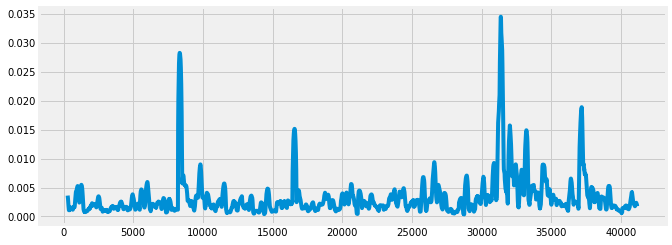

In [54]:
plt.figure(figsize=(10,4))
plt.plot(data.logADP.rolling(300).std())

In [55]:
data.head()

,DATE,DATE_F,ADP,logADP,diflogADP,predict,error,sqrError,absError
0,1491226200,2017-04-03 13:30:00,102.2300,4.627225,0.000881,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 13:31:00,102.1400,4.626344,-0.000710,4.627226,-0.000882,7.775043e-07,0.000882
2,1491226320,2017-04-03 13:32:00,102.2125,4.627054,0.000710,4.626294,0.000760,5.780108e-07,0.000760
3,1491226380,2017-04-03 13:33:00,102.1400,4.626344,0.000784,4.627120,-0.000775,6.008874e-07,0.000775
4,1491226440,2017-04-03 13:34:00,102.0600,4.625561,0.000196,4.626308,-0.000747,5.583438e-07,0.000747


In [56]:
import numpy as np

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

print("MFE = ", mean_forecast_err(data.ADP, np.exp(data.predict)))
print("MAE = ", mean_absolute_err(data.ADP, np.exp(data.predict)))

MFE =  1.0290741279785527e-06
MAE =  9.962611117575958e-09


Mean Forecast error is zero, which shows that ARIMA is a great fit

#### 3. CBOE

In [0]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
df['logCBOE']= np.log(df['CBOE'])
df['diflogCBOE'] = df['logCBOE'] - df['logCBOE'].shift(periods=-1)
df = df.dropna()

In [0]:
# Splitting the data into 2 - for model fit and for test
data = df[['DATE','DATE_F','CBOE','logCBOE','diflogCBOE']][:-100]
test = df[['DATE','DATE_F','CBOE','logCBOE','diflogCBOE']][-100:]

In [59]:
print("Size of data ", data.shape)
print("Size of test ", test.shape)

Size of data  (41163, 5)
Size of test  (100, 5)


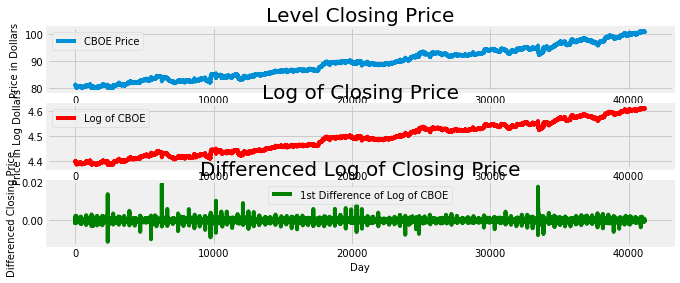

In [60]:
# Plotting the series and its transformation to check for stationarity

fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.CBOE, label = "CBOE Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data.logCBOE, label = 'Log of CBOE', color = 'r')
plt.title("Log of Closing Price", size = 20,)
plt.ylabel("Price in Log Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot( data.diflogCBOE, label = '1st Difference of Log of CBOE', color = 'g')
plt.title("Differenced Log of Closing Price", size = 20,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)
plt.legend()

In [61]:
#Perform Dickey-Fuller test TO TEST FOR STATIONARITY:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data.diflogCBOE, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -42.147145
p-value                            0.000000
# Lags Used                       25.000000
Number of Observations Used    41137.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


Since p-value = 0, this log-first-difference series is stationary.

In [62]:
# Now, check for Autocorrelation
sm.stats.durbin_watson(df['diflogCBOE'].dropna())

2.153144539229907

Minimum auto-correlation

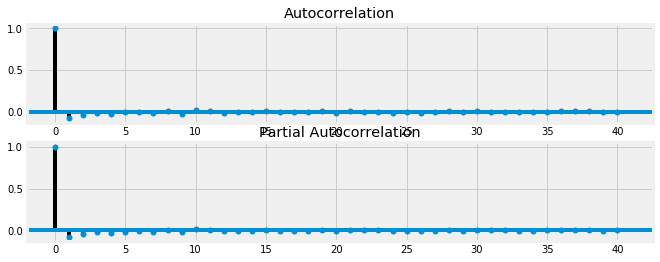

In [63]:
# Lets plot ACF and PACF plots

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['diflogCBOE'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['diflogCBOE'], lags=40, ax=ax2)

In [64]:
# To systematically find the ARIMA model parameters

ararray = (data.logCBOE.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(0, 1, 0) -504739.1254174707
(0, 1, 1) -505004.46738867706
(0, 1, 2) -505095.4018782902
(1, 1, 0) -504981.5647792355
(1, 1, 1) -505139.07218305604
(1, 1, 2) -505131.0270064594
(2, 1, 0) -505076.85022453044
(2, 1, 1) -505132.2206294945
(2, 1, 2) -505138.3893300432
Best Model is : (1, 1, 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [0]:
# Now, fit the ARIMA for the best parameters
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

In [66]:
data.loc[1:, 'predict'] = np.exp(ARIMIAmod.predict(typ='levels'))
data.head()

,DATE,DATE_F,CBOE,logCBOE,diflogCBOE,predict
0,1491226200,2017-04-03 13:30:00,81.03,4.394819,-0.002219,NaN
1,1491226260,2017-04-03 13:31:00,81.21,4.397038,0.000000,81.030430
2,1491226320,2017-04-03 13:32:00,81.21,4.397038,0.000986,81.196536
3,1491226380,2017-04-03 13:33:00,81.13,4.396053,0.000123,81.202207
4,1491226440,2017-04-03 13:34:00,81.12,4.395930,-0.001232,81.132137


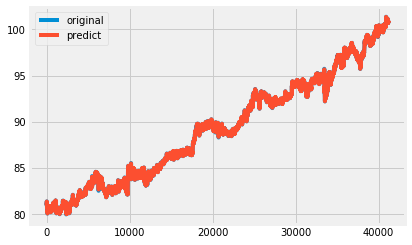

In [67]:
plt.plot(data['CBOE'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [68]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[4.61259547, 4.61464744],
       [4.61222526, 4.61500965],
       [4.61196161, 4.61527436],
       [4.61174754, 4.61549413],
       [4.61156214, 4.61568762],
       [4.61139561, 4.61586345],
       [4.61124271, 4.6160263 ],
       [4.61110028, 4.616179  ],
       [4.6109663 , 4.6163234 ],
       [4.61083938, 4.61646084]])

In [69]:
data['error'] = (data['CBOE'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])
data.head()

,DATE,DATE_F,CBOE,logCBOE,diflogCBOE,predict,error,sqrError,absError
0,1491226200,2017-04-03 13:30:00,81.03,4.394819,-0.002219,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 13:31:00,81.21,4.397038,0.000000,81.030430,0.179570,0.032245,0.179570
2,1491226320,2017-04-03 13:32:00,81.21,4.397038,0.000986,81.196536,0.013464,0.000181,0.013464
3,1491226380,2017-04-03 13:33:00,81.13,4.396053,0.000123,81.202207,-0.072207,0.005214,0.072207
4,1491226440,2017-04-03 13:34:00,81.12,4.395930,-0.001232,81.132137,-0.012137,0.000147,0.012137


Text(0.5, 0, 'Month')

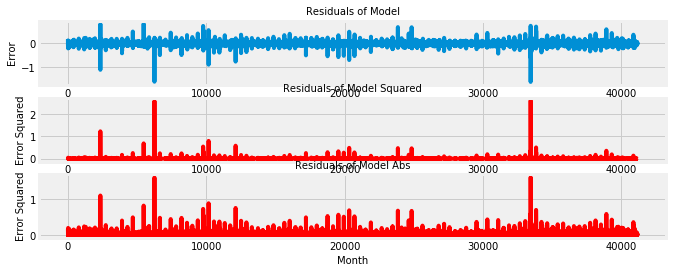

In [70]:
fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

Text(0, 0.5, 'ACF')

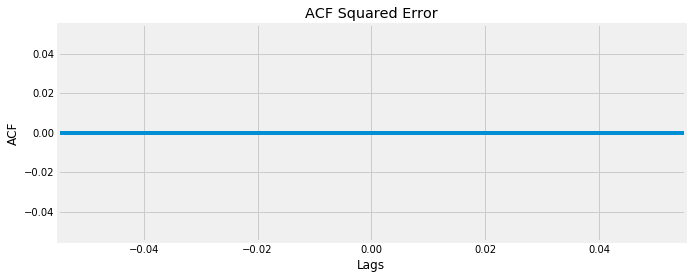

In [71]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.error, lags = 25, ax = ax)
ax.set_title('ACF Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

plot_acf(data.sqrError, lags = 25, ax = ax)
ax.set_title('ACF Squared Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

Text(0, 0.5, 'PACF')

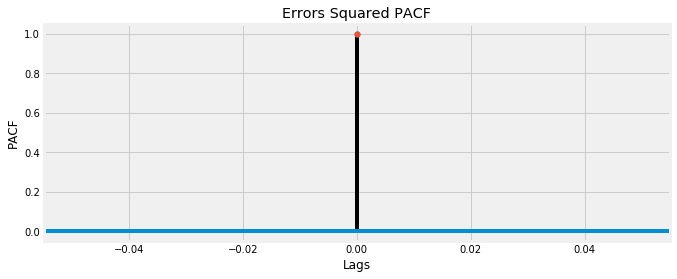

In [72]:
fig, ax = plt.subplots(figsize=(10,4))

plot_pacf(data.error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

plot_pacf(data.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

#### Forecasting

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


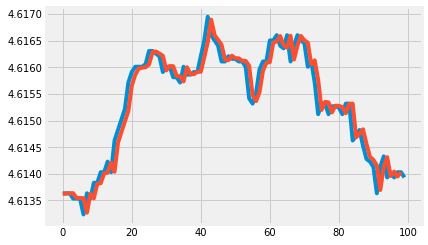

In [73]:
test = test.reset_index()
test_logCBOE = list(test.logCBOE.values)

ararray = list(data.logCBOE.values)
test_predict = []
for i in range(99):
    print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logCBOE[i])
    
plt.plot(test_logCBOE)
plt.plot(np.array(test_predict).ravel())

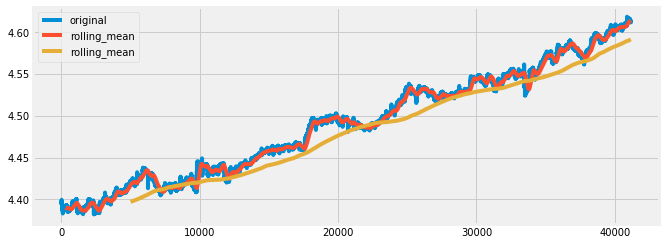

In [74]:
plt.figure(figsize=(10,4))
plt.plot(data.logCBOE, label='original')
plt.plot(data.logCBOE.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logCBOE.rolling(5000).mean(), label='rolling_mean')
plt.legend()

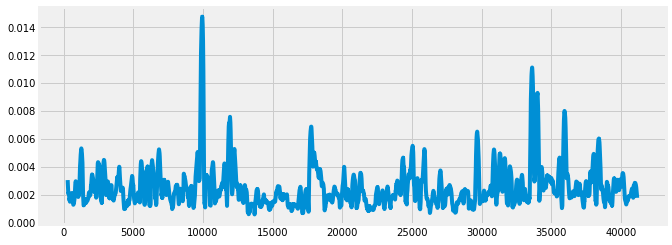

In [75]:
plt.figure(figsize=(10,4))
plt.plot(data.logCBOE.rolling(300).std())

In [76]:
data.head()

,DATE,DATE_F,CBOE,logCBOE,diflogCBOE,predict,error,sqrError,absError
0,1491226200,2017-04-03 13:30:00,81.03,4.394819,-0.002219,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 13:31:00,81.21,4.397038,0.000000,81.030430,0.179570,0.032245,0.179570
2,1491226320,2017-04-03 13:32:00,81.21,4.397038,0.000986,81.196536,0.013464,0.000181,0.013464
3,1491226380,2017-04-03 13:33:00,81.13,4.396053,0.000123,81.202207,-0.072207,0.005214,0.072207
4,1491226440,2017-04-03 13:34:00,81.12,4.395930,-0.001232,81.132137,-0.012137,0.000147,0.012137


In [77]:
import numpy as np

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

print("MFE = ", mean_forecast_err(data.CBOE, data.predict))
print("MAE = ", mean_absolute_err(data.CBOE, data.predict))

MFE =  1.151663176699451e-05
MAE =  1.2949887736651964e-07


Mean Forecast error is zero, which shows that ARIMA is a great fit

#### 4. CSCO

In [0]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
df['logCSCO']= np.log(df['CSCO'])
df['diflogCSCO'] = df['logCSCO'] - df['logCSCO'].shift(periods=-1)
df = df.dropna()

In [0]:
# Splitting the data into 2 - for model fit and for test
data = df[['DATE','DATE_F','CSCO','logCSCO','diflogCSCO']][:-100]
test = df[['DATE','DATE_F','CSCO','logCSCO','diflogCSCO']][-100:]

In [80]:
print("Size of data ", data.shape)
print("Size of test ", test.shape)

Size of data  (41162, 5)
Size of test  (100, 5)


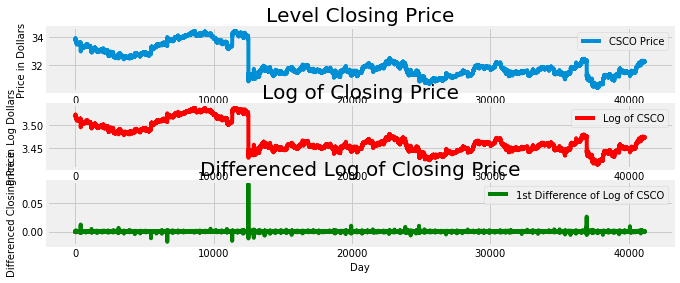

In [81]:
# Plotting the series and its transformation to check for stationarity

fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.CSCO, label = "CSCO Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data.logCSCO, label = 'Log of CSCO', color = 'r')
plt.title("Log of Closing Price", size = 20,)
plt.ylabel("Price in Log Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot( data.diflogCSCO, label = '1st Difference of Log of CSCO', color = 'g')
plt.title("Differenced Log of Closing Price", size = 20,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)
plt.legend()

In [82]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data.diflogCSCO, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -30.334243
p-value                            0.000000
# Lags Used                       46.000000
Number of Observations Used    41115.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


Since p-value = 0, this log-first-difference series is stationary.

In [83]:
# Check for autocorrelation
sm.stats.durbin_watson(df['diflogCSCO'].dropna())

1.9667921853383388

Minimum auto-correlation

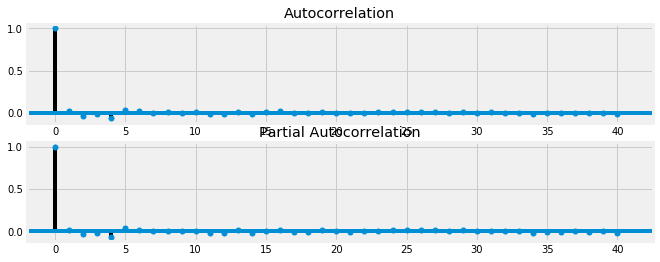

In [84]:
# Lets plot ACF and PACF plots

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['diflogCSCO'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['diflogCSCO'], lags=40, ax=ax2)

In [85]:
# To systematically find the ARIMA model parameters

ararray = (data.logCSCO.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(0, 1, 0) -485563.78878472815
(0, 1, 1) -485573.18856586027
(0, 1, 2) -485634.073574255
(1, 1, 0) -485572.40293799026


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 1, 1) -485573.95768984174


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 1, 2) -485633.6101766955
(2, 1, 0) -485628.26375627087


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 1, 1) -485626.6364533359
(2, 1, 2) -485643.60436149954
Best Model is : (2, 1, 2)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


#### Model Building

In [86]:
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

data.loc[1:, 'predict'] = np.exp(ARIMIAmod.predict(typ='levels'))
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


,DATE,DATE_F,CSCO,logCSCO,diflogCSCO,predict
0,1491226200,2017-04-03 13:30:00,33.7400,3.518684,-0.004141,NaN
1,1491226260,2017-04-03 13:31:00,33.8800,3.522825,-0.000590,33.739963
2,1491226320,2017-04-03 13:32:00,33.9000,3.523415,0.001479,33.882182
3,1491226380,2017-04-03 13:33:00,33.8499,3.521936,0.000293,33.895004
4,1491226440,2017-04-03 13:34:00,33.8400,3.521644,-0.001181,33.848414


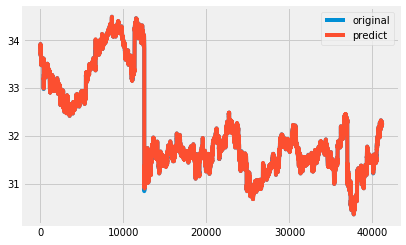

In [87]:
plt.plot(data['CSCO'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [88]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[3.47265944, 3.47525922],
       [3.47210555, 3.47581254],
       [3.47170814, 3.47620461],
       [3.47137211, 3.47653846],
       [3.4710762 , 3.47683196],
       [3.47080795, 3.47709801],
       [3.47056078, 3.47734299],
       [3.4703303 , 3.47757127],
       [3.47011353, 3.47778587],
       [3.46990825, 3.47798896]])

In [89]:
data['error'] = (data['CSCO'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])
data.head()

,DATE,DATE_F,CSCO,logCSCO,diflogCSCO,predict,error,sqrError,absError
0,1491226200,2017-04-03 13:30:00,33.7400,3.518684,-0.004141,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 13:31:00,33.8800,3.522825,-0.000590,33.739963,0.140037,0.019610,0.140037
2,1491226320,2017-04-03 13:32:00,33.9000,3.523415,0.001479,33.882182,0.017818,0.000317,0.017818
3,1491226380,2017-04-03 13:33:00,33.8499,3.521936,0.000293,33.895004,-0.045104,0.002034,0.045104
4,1491226440,2017-04-03 13:34:00,33.8400,3.521644,-0.001181,33.848414,-0.008414,0.000071,0.008414


Text(0.5, 0, 'Month')

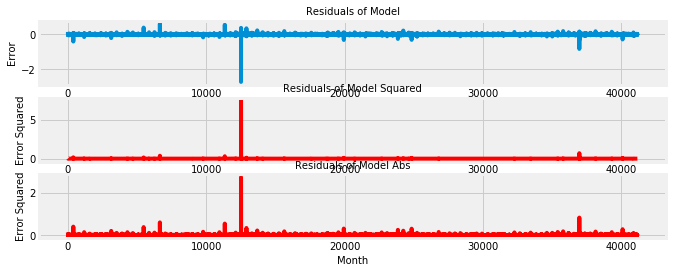

In [90]:
fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

Text(0, 0.5, 'ACF')

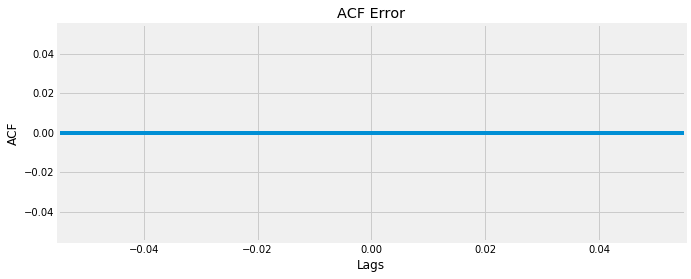

In [91]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.error, lags = 25, ax = ax)
ax.set_title('ACF Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

Text(0, 0.5, 'ACF')

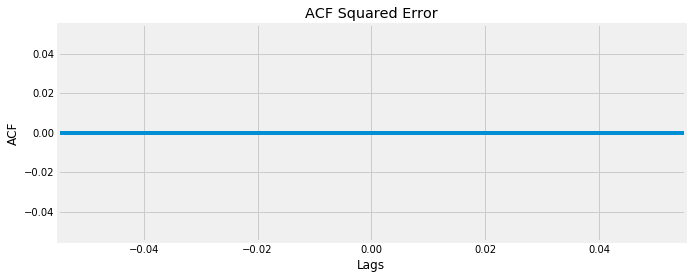

In [92]:
fig, ax = plt.subplots(figsize=(10,4))
plot_acf(data.sqrError, lags = 25, ax = ax)
ax.set_title('ACF Squared Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

Text(0, 0.5, 'PACF')

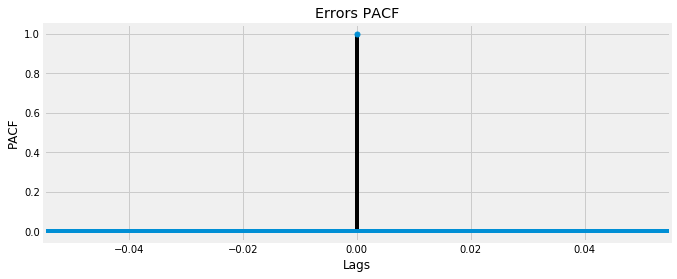

In [93]:
fig, ax = plt.subplots(figsize=(10,4))

plot_pacf(data.error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


Text(0, 0.5, 'PACF')

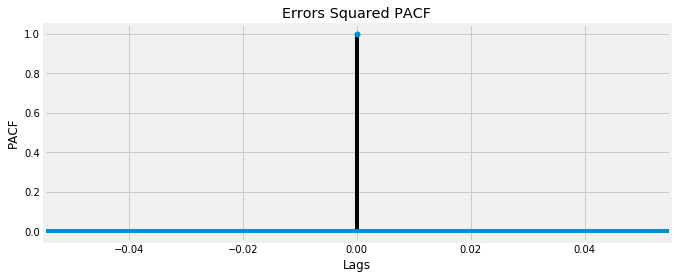

In [94]:
fig, ax = plt.subplots(figsize=(10,4))

plot_pacf(data.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

#### Forecasting

0


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


11


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


12


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


13


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


14


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


15


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


16


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


17


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


18


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


19


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


20


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


21


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


22


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


23


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


24


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


25


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


26


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


27


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


28


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


29


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


30


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


31


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


32


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


33


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


34


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


36


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


37


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


38


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


39


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


40


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


41


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


42


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


43


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


44


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


45


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


46


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


47


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


48


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


49


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


50


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


51


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


52


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


53


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


54


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


55


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


56


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


57


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


58


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


59


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


60


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


61


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


62


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


63


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


64


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


65


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


66


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


67


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


68


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


69


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


70


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


71


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


72


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


73


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


74


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


75


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


76


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


77


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


78


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


79


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


80


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


81


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


82


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


83


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


84


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


85


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


86


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


87


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


88


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


89


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


90


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


91


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


92


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


93


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


94


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


95


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


96


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


97


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


98


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


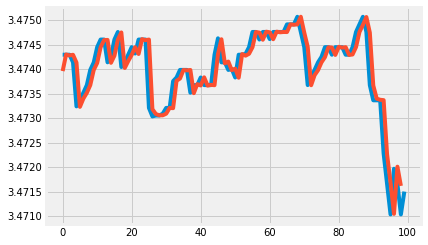

In [95]:
test = test.reset_index()
test_logCSCO = list(test.logCSCO.values)

ararray = list(data.logCSCO.values)
test_predict = []
for i in range(99):
    print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logCSCO[i])
    
plt.plot(test_logCSCO)
plt.plot(np.array(test_predict).ravel())

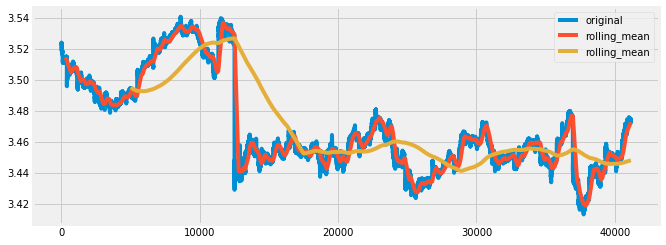

In [96]:
plt.figure(figsize=(10,4))
plt.plot(data.logCSCO, label='original')
plt.plot(data.logCSCO.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logCSCO.rolling(5000).mean(), label='rolling_mean')
plt.legend()

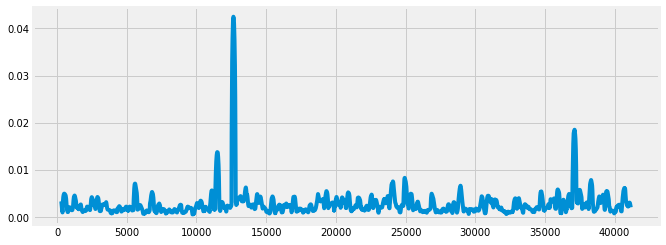

In [97]:
plt.figure(figsize=(10,4))
plt.plot(data.logCSCO.rolling(300).std())

In [98]:
data.head()

,DATE,DATE_F,CSCO,logCSCO,diflogCSCO,predict,error,sqrError,absError
0,1491226200,2017-04-03 13:30:00,33.7400,3.518684,-0.004141,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 13:31:00,33.8800,3.522825,-0.000590,33.739963,0.140037,0.019610,0.140037
2,1491226320,2017-04-03 13:32:00,33.9000,3.523415,0.001479,33.882182,0.017818,0.000317,0.017818
3,1491226380,2017-04-03 13:33:00,33.8499,3.521936,0.000293,33.895004,-0.045104,0.002034,0.045104
4,1491226440,2017-04-03 13:34:00,33.8400,3.521644,-0.001181,33.848414,-0.008414,0.000071,0.008414


In [99]:
import numpy as np

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

print("MFE = ", mean_forecast_err(data.CSCO, data.predict))
print("MAE = ", mean_absolute_err(data.CSCO, data.predict))

MFE =  -5.999154003246994e-07
MAE =  1.8683462024991225e-08


Mean Forecast error is zero, which shows that ARIMA is a great fit

#### 5.EBAY

In [0]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
df['logEBAY']= np.log(df['EBAY'])
df['diflogEBAY'] = df['logEBAY'] - df['logEBAY'].shift(periods=-1)
df = df.dropna()

In [0]:
# Splitting the data into 2 - for model fit and for test
data = df[['DATE','DATE_F','EBAY','logEBAY','diflogEBAY']][:-100]
test = df[['DATE','DATE_F','EBAY','logEBAY','diflogEBAY']][-100:]

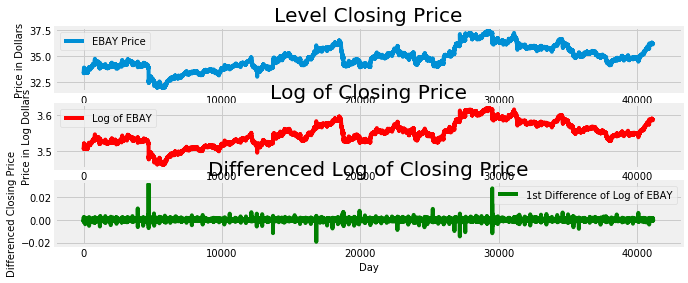

In [102]:
# Plotting the series and its transformation to check for stationarity

fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.EBAY, label = "EBAY Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data.logEBAY, label = 'Log of EBAY', color = 'r')
plt.title("Log of Closing Price", size = 20,)
plt.ylabel("Price in Log Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot( data.diflogEBAY, label = '1st Difference of Log of EBAY', color = 'g')
plt.title("Differenced Log of Closing Price", size = 20,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)
plt.legend()

In [103]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data.diflogEBAY, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -30.610925
p-value                            0.000000
# Lags Used                       46.000000
Number of Observations Used    41114.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


Since p-value = 0, this log-first-difference series is stationary.

In [104]:
# Check for autocorrelation
sm.stats.durbin_watson(df['diflogEBAY'].dropna())

2.080137083543523

Minimum Autocorrelation

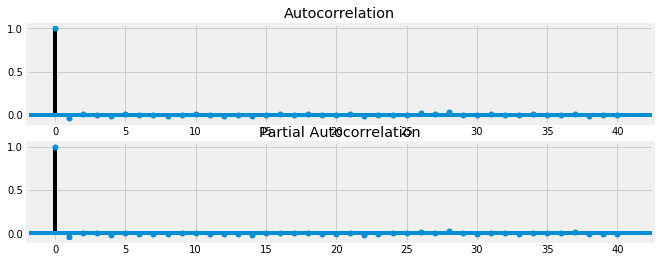

In [105]:

# Lets plot ACF and PACF plots

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['diflogEBAY'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['diflogEBAY'], lags=40, ax=ax2)

In [106]:
# To systematically find the ARIMA model parameters

ararray = (data.logEBAY.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(0, 1, 0) -485231.06152541446
(0, 1, 1) -485295.2256426607
(0, 1, 2) -485295.6415446543
(1, 1, 0) -485296.1613394343
(1, 1, 1) -485295.47629970097
(1, 1, 2) -485293.762672041
(2, 1, 0) -485295.7396623174
(2, 1, 1) -485293.73746271984
(2, 1, 2) -485291.7664961601
Best Model is : (1, 1, 0)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


#### Building Model

In [107]:
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

data.loc[1:, 'predict'] = np.exp(ARIMIAmod.predict(typ='levels'))
data.head()

,DATE,DATE_F,EBAY,logEBAY,diflogEBAY,predict
0,1491226200,2017-04-03 13:30:00,33.3975,3.508481,0.000075,NaN
1,1491226260,2017-04-03 13:31:00,33.3950,3.508406,-0.000449,33.397563
2,1491226320,2017-04-03 13:32:00,33.4100,3.508855,0.002247,33.395167
3,1491226380,2017-04-03 13:33:00,33.3350,3.506608,-0.001948,33.409460
4,1491226440,2017-04-03 13:34:00,33.4000,3.508556,-0.000898,33.338089


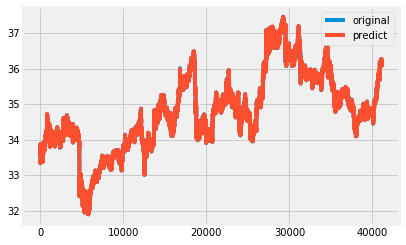

In [108]:
plt.plot(data['EBAY'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [109]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[3.58498954, 3.58760013],
       [3.58448762, 3.58810582],
       [3.58409697, 3.58850025],
       [3.58376646, 3.58883454],
       [3.58347475, 3.58913003],
       [3.58321079, 3.58939777],
       [3.58296793, 3.58964441],
       [3.58274183, 3.5898743 ],
       [3.58252945, 3.59009045],
       [3.58232858, 3.5902951 ]])

In [110]:
data['error'] = (data['EBAY'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])
data.head()

,DATE,DATE_F,EBAY,logEBAY,diflogEBAY,predict,error,sqrError,absError
0,1491226200,2017-04-03 13:30:00,33.3975,3.508481,0.000075,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 13:31:00,33.3950,3.508406,-0.000449,33.397563,-0.002563,0.000007,0.002563
2,1491226320,2017-04-03 13:32:00,33.4100,3.508855,0.002247,33.395167,0.014833,0.000220,0.014833
3,1491226380,2017-04-03 13:33:00,33.3350,3.506608,-0.001948,33.409460,-0.074460,0.005544,0.074460
4,1491226440,2017-04-03 13:34:00,33.4000,3.508556,-0.000898,33.338089,0.061911,0.003833,0.061911


Text(0.5, 0, 'Month')

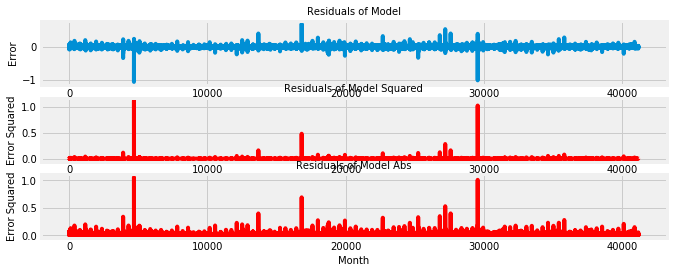

In [111]:
fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

Text(0, 0.5, 'ACF')

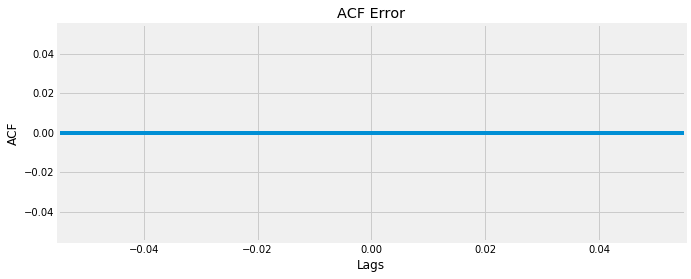

In [112]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.error, lags = 25, ax = ax)
ax.set_title('ACF Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')


Text(0, 0.5, 'ACF')

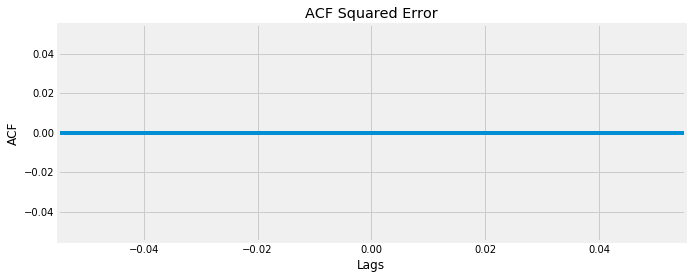

In [113]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.sqrError, lags = 25, ax = ax)
ax.set_title('ACF Squared Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

0
1
2
3
4
5
6


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


29
30
31
32
33
34
35
36


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


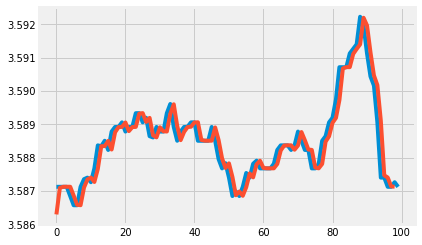

In [114]:
test = test.reset_index()
test_logEBAY = list(test.logEBAY.values)

ararray = list(data.logEBAY.values)
test_predict = []
for i in range(99):
    print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logEBAY[i])
    
plt.plot(test_logEBAY)
plt.plot(np.array(test_predict).ravel())

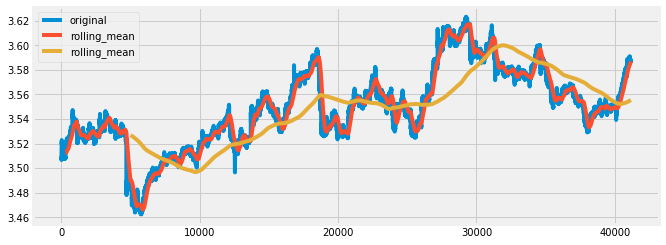

In [115]:
plt.figure(figsize=(10,4))
plt.plot(data.logEBAY, label='original')
plt.plot(data.logEBAY.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logEBAY.rolling(5000).mean(), label='rolling_mean')
plt.legend()

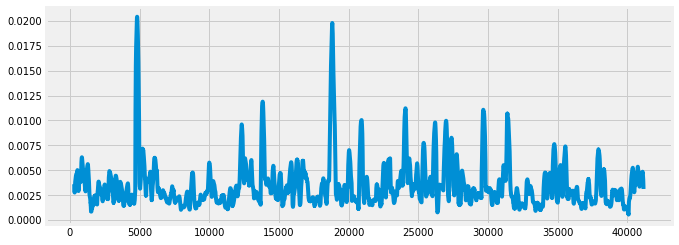

In [116]:
plt.figure(figsize=(10,4))
plt.plot(data.logEBAY.rolling(300).std())

In [117]:
data.head()

,DATE,DATE_F,EBAY,logEBAY,diflogEBAY,predict,error,sqrError,absError
0,1491226200,2017-04-03 13:30:00,33.3975,3.508481,0.000075,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 13:31:00,33.3950,3.508406,-0.000449,33.397563,-0.002563,0.000007,0.002563
2,1491226320,2017-04-03 13:32:00,33.4100,3.508855,0.002247,33.395167,0.014833,0.000220,0.014833
3,1491226380,2017-04-03 13:33:00,33.3350,3.506608,-0.001948,33.409460,-0.074460,0.005544,0.074460
4,1491226440,2017-04-03 13:34:00,33.4000,3.508556,-0.000898,33.338089,0.061911,0.003833,0.061911


In [118]:
import numpy as np

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

print("MFE = ", mean_forecast_err(data.EBAY, data.predict))
print("MAE = ", mean_absolute_err(data.EBAY, data.predict))

MFE =  1.8258925429677842e-07
MAE =  5.253414167771105e-09


Mean Forecast error is zero, which shows that ARIMA is a great fit